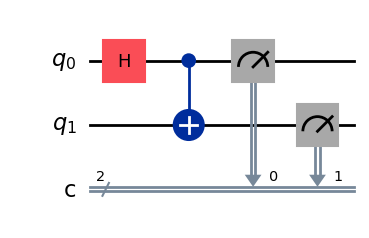

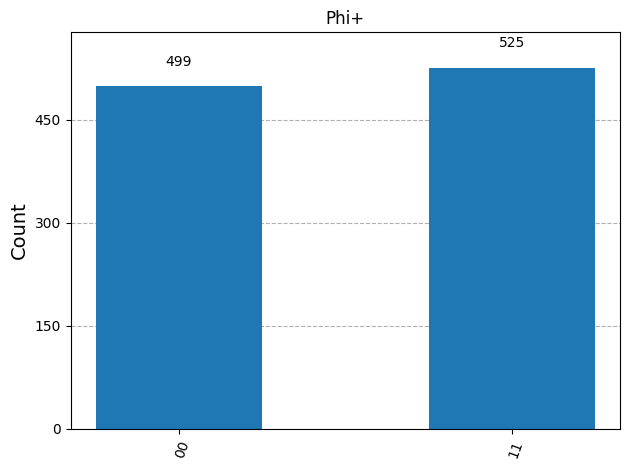

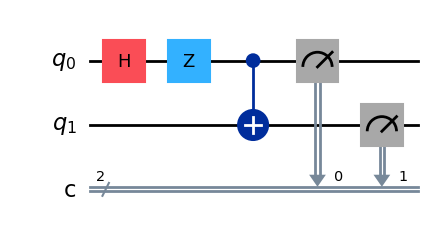

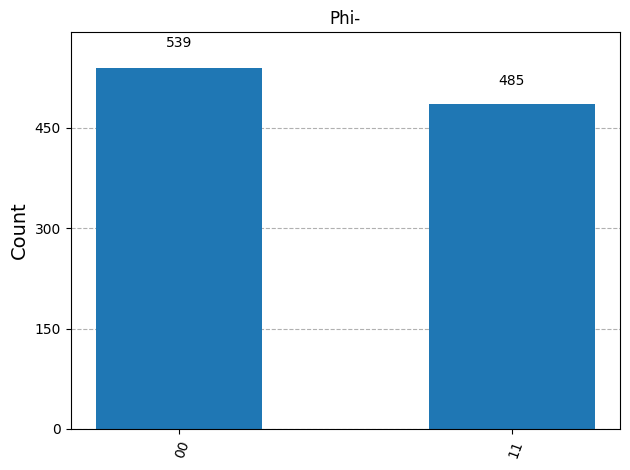

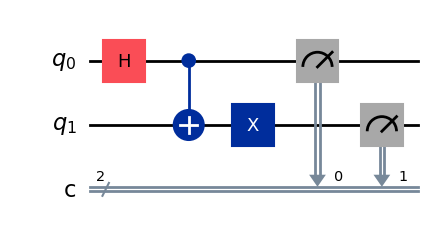

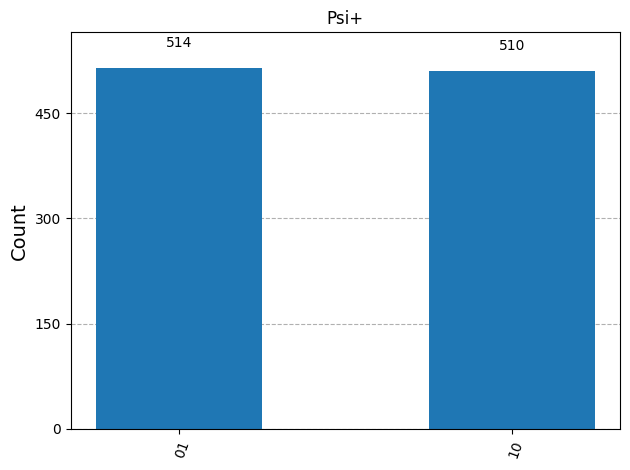

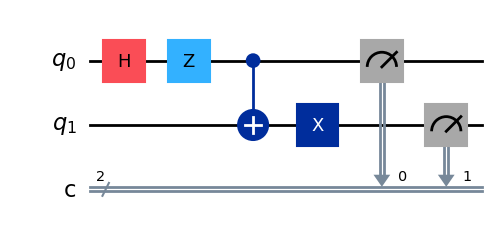

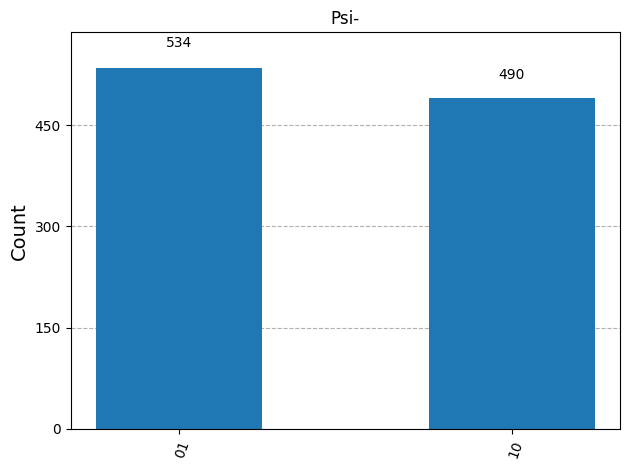

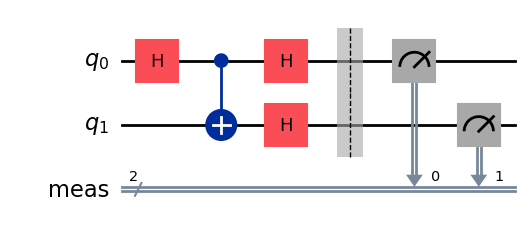

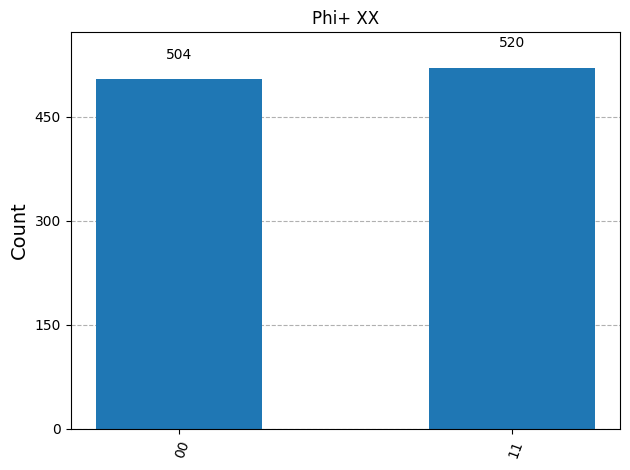

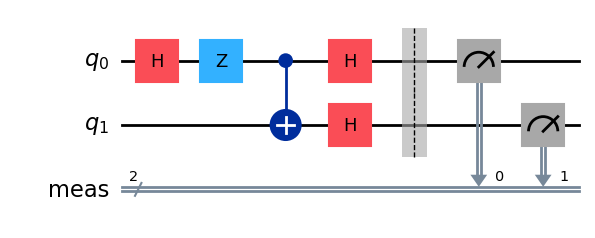

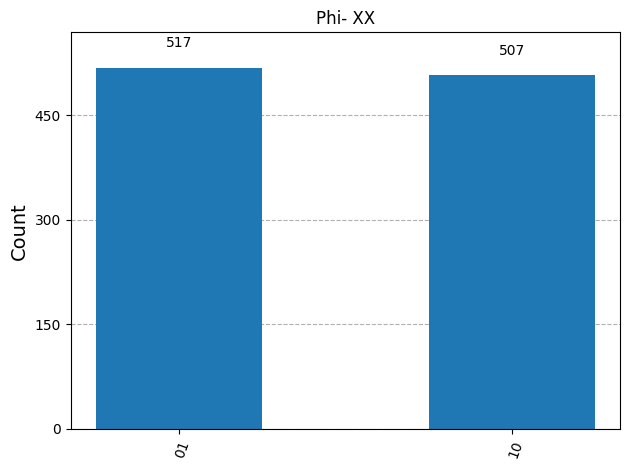

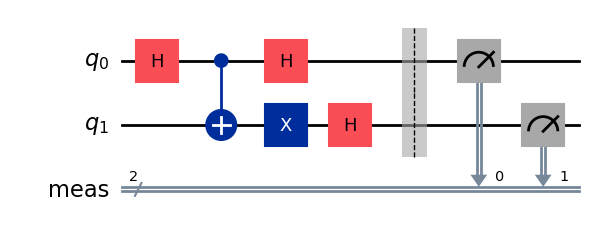

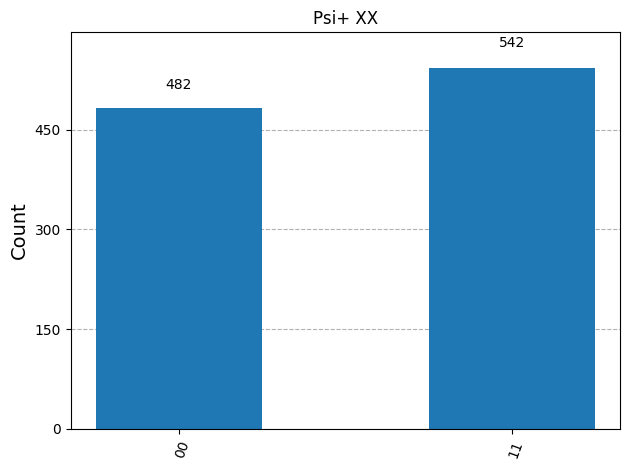

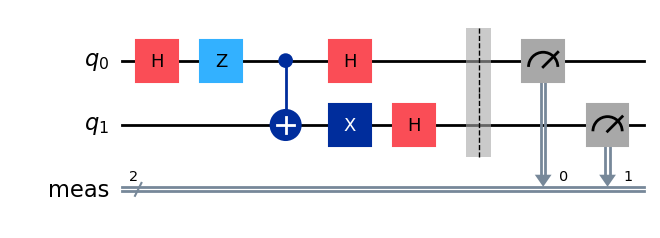

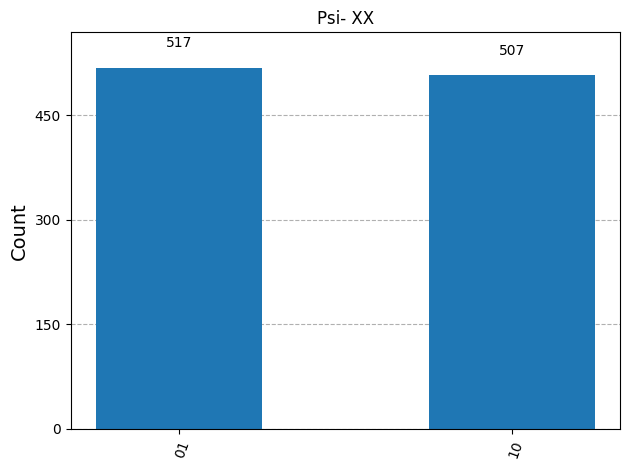

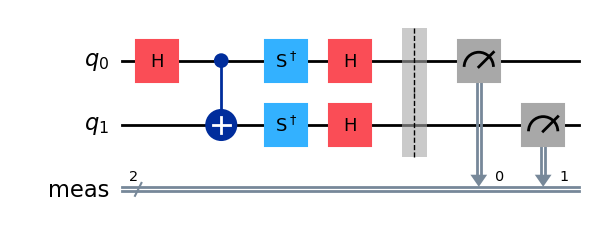

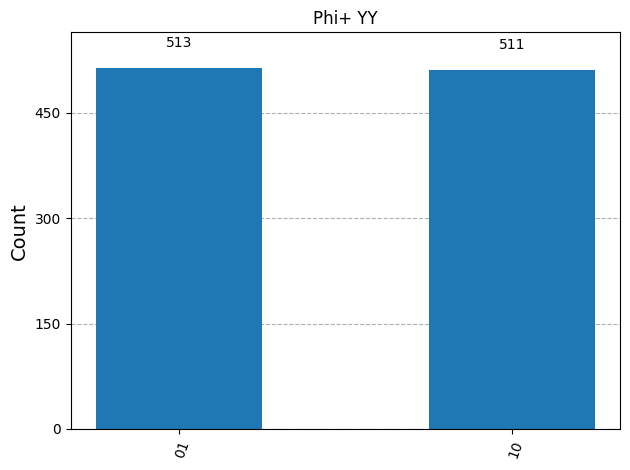

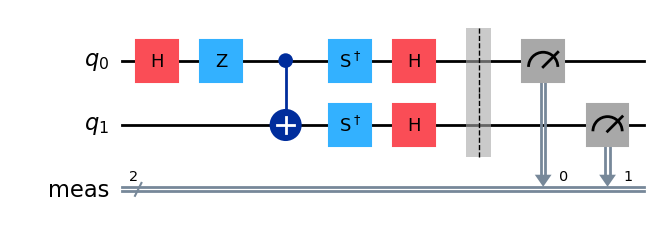

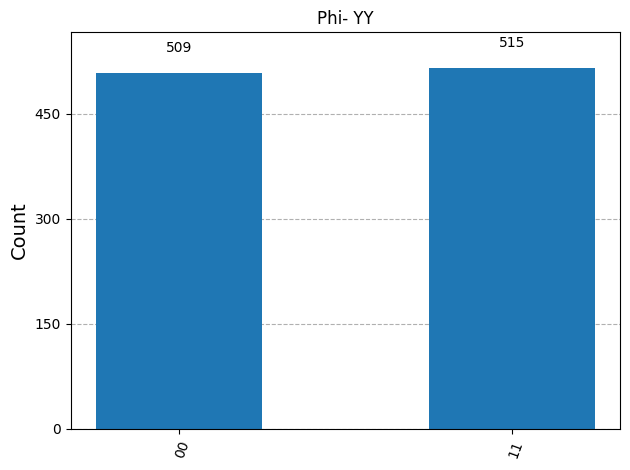

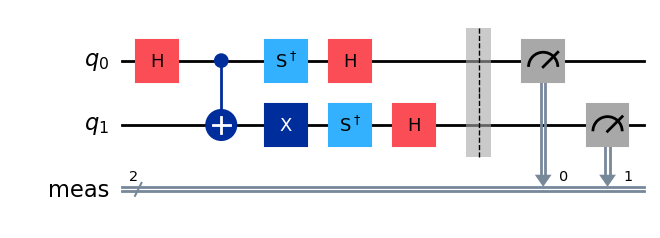

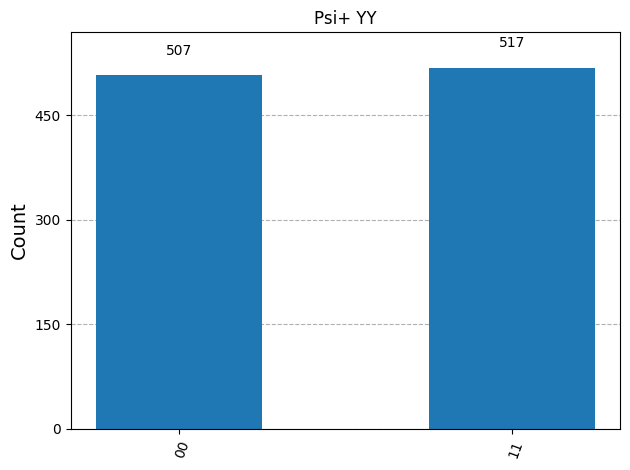

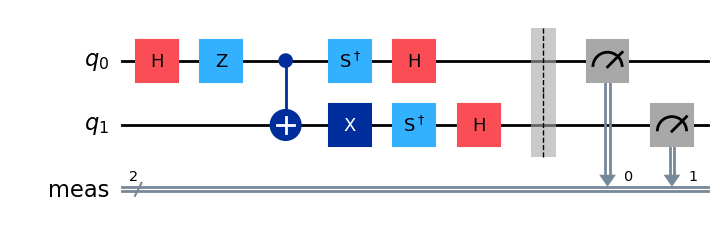

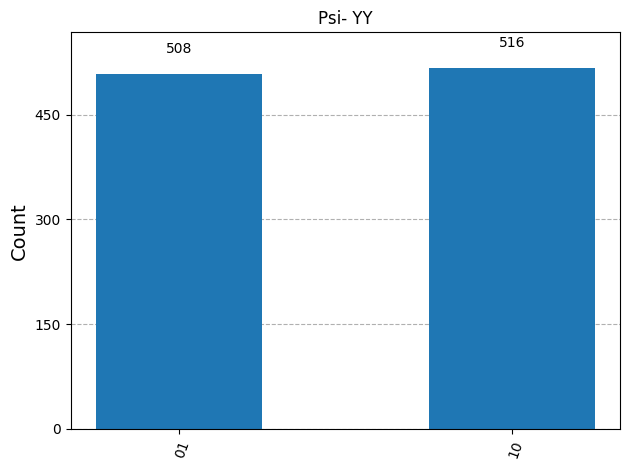

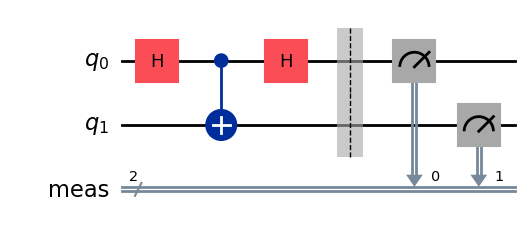

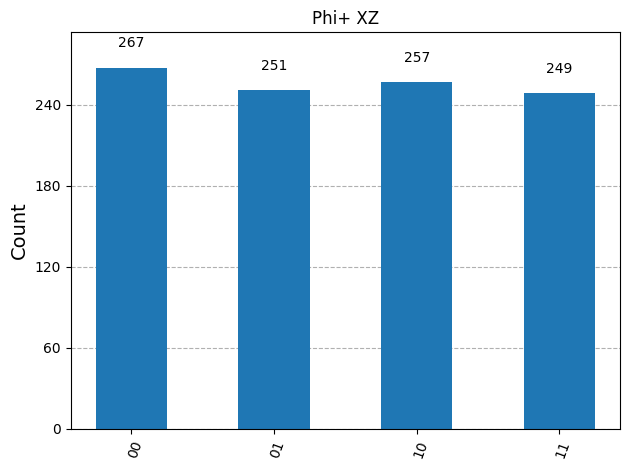

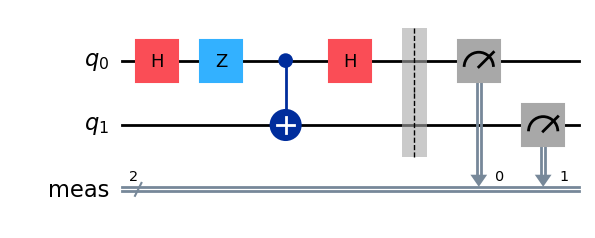

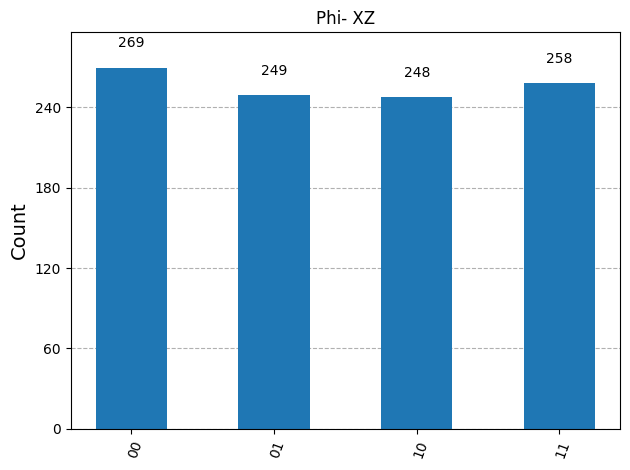

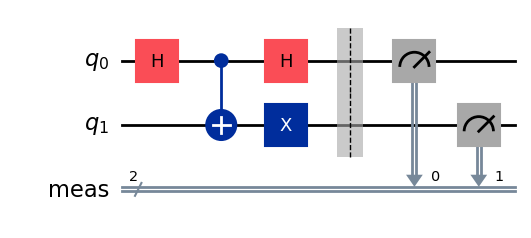

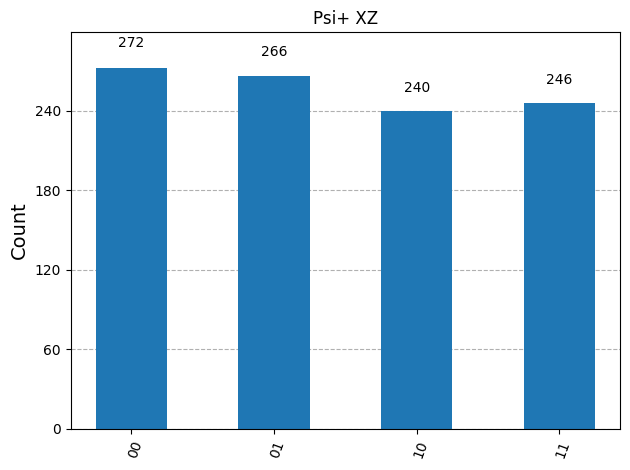

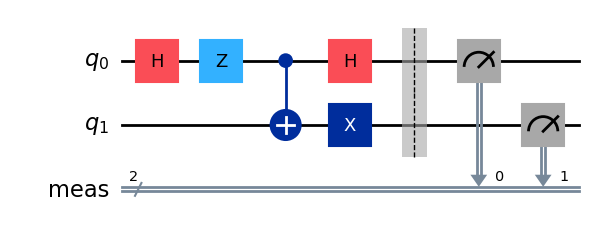

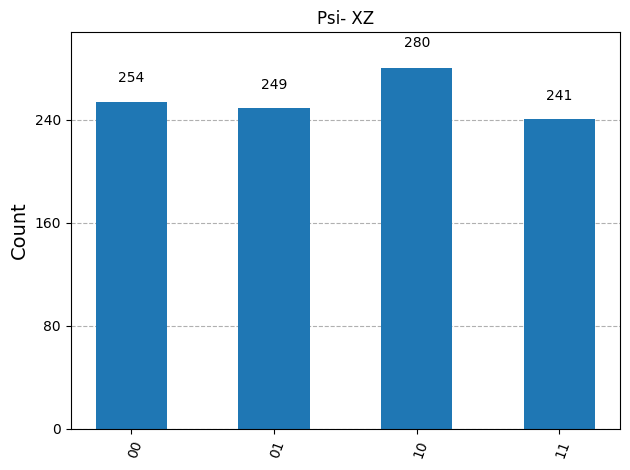

Matrix form |Phi->
[ 0.70710678  0.          0.         -0.70710678]
Operator form |Psi+>
Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))
Operator form |Psi->
Statevector([ 0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt
import os

os.makedirs("outputs", exist_ok=True)

simulator = AerSimulator()

# -------- Bell state circuits (Tasks 1–4) --------

qc_phi_plus = QuantumCircuit(2, 2)
qc_phi_plus.h(0)
qc_phi_plus.cx(0, 1)
qc_phi_plus.measure([0,1], [0,1])

qc_phi_minus = QuantumCircuit(2, 2)
qc_phi_minus.h(0)
qc_phi_minus.z(0)
qc_phi_minus.cx(0, 1)
qc_phi_minus.measure([0,1], [0,1])

qc_psi_plus = QuantumCircuit(2, 2)
qc_psi_plus.h(0)
qc_psi_plus.cx(0, 1)
qc_psi_plus.x(1)
qc_psi_plus.measure([0,1], [0,1])

qc_psi_minus = QuantumCircuit(2, 2)
qc_psi_minus.h(0)
qc_psi_minus.z(0)
qc_psi_minus.cx(0, 1)
qc_psi_minus.x(1)
qc_psi_minus.measure([0,1], [0,1])

circuits = {
    "Phi+": qc_phi_plus,
    "Phi-": qc_phi_minus,
    "Psi+": qc_psi_plus,
    "Psi-": qc_psi_minus
}

# -------- Plot circuits + histograms -------

for name, qc in circuits.items():
    fig = qc.draw("mpl")
    fig.savefig(f"outputs/{name}_circuit.png")
    display(fig)
    job = simulator.run(qc, shots=1024)
    result = job.result()
    fig_hist = plot_histogram(result.get_counts(qc), title=name)
    fig_hist.savefig(f"outputs/{name}_histogram.png")
    display(fig_hist)

# -------- Measurement bases (Tasks 5–7) --------

def measure_xx(qc):
    c = qc.remove_final_measurements(inplace=False)
    c.h(0)
    c.h(1)
    c.measure_all()
    return c

def measure_yy(qc):
    c = qc.remove_final_measurements(inplace=False)
    c.sdg(0)
    c.sdg(1)
    c.h(0)
    c.h(1)
    c.measure_all()
    return c

def measure_xz(qc):
    c = qc.remove_final_measurements(inplace=False)
    c.h(0)
    c.measure_all()
    return c

measurements = {
    "XX": measure_xx,
    "YY": measure_yy,
    "XZ": measure_xz
}

for meas_name, meas_func in measurements.items():
    for state_name, qc in circuits.items():
        qc_m = meas_func(qc)
        fig = qc_m.draw("mpl")
        fig.savefig(f"outputs/{state_name}_{meas_name}_circuit.png")
        display(fig)
        job = simulator.run(qc_m, shots=1024)
        result = job.result()
        fig_hist = plot_histogram(result.get_counts(qc_m), title=f"{state_name} {meas_name}")
        fig_hist.savefig(f"outputs/{state_name}_{meas_name}_histogram.png")
        display(fig_hist)

# -------- Mathematical calculations --------

H = (1/np.sqrt(2)) * np.array([[1,1],[1,-1]])
Z = np.array([[1,0],[0,-1]])
X = np.array([[0,1],[1,0]])
I = np.eye(2)

CX = np.array([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,0,1],
    [0,0,1,0]
])

psi0 = np.array([1,0,0,0])

# Matrix form — Task 2 (Phi-)
psi_phi_minus = CX @ np.kron(Z @ H, I) @ psi0
print("Matrix form |Phi->")
print(psi_phi_minus)

# Operator form — Task 3 (Psi+)
sv_psi_plus = Statevector.from_label("00")
sv_psi_plus = sv_psi_plus.evolve(np.kron(H, I))
sv_psi_plus = sv_psi_plus.evolve(CX)
sv_psi_plus = sv_psi_plus.evolve(np.kron(I, X))
print("Operator form |Psi+>")
print(sv_psi_plus)

# Operator form — Task 4 (Psi-)
sv_psi_minus = Statevector.from_label("00")
sv_psi_minus = sv_psi_minus.evolve(np.kron(Z @ H, I))
sv_psi_minus = sv_psi_minus.evolve(CX)
sv_psi_minus = sv_psi_minus.evolve(np.kron(I, X))
print("Operator form |Psi->")
print(sv_psi_minus)